In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns




In [2]:
# Read in the CSV as a DataFrame
output_data_file = "NetflixDF4.csv"
netflix_df = pd.read_csv(output_data_file)
netflix_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103


In [3]:
#Display Columns
netflix_df.columns


Index(['show_id', 'title', 'release_year', 'type', 'rating', 'country',
       'genre', 'duration'],
      dtype='object')

In [4]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df.type == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[[ 'release_year','country',]]

# Print the first five rows of the new DataFrame
display(netflix_movies_col_subset.head())

,release_year,country
0,2020,United States
1,1993,United States
2,2021,United States
3,1998,India
4,2010,United States


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3558 non-null   object
 1   title         3558 non-null   object
 2   release_year  3558 non-null   int64 
 3   type          3558 non-null   object
 4   rating        3558 non-null   object
 5   country       3558 non-null   object
 6   genre         3558 non-null   object
 7   duration      3558 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 222.5+ KB


In [6]:
#We defined the number of rows and columns
netflix_df.shape

(3558, 8)

In [7]:
#We counted the number of movies released in the year
netflix_df["release_year"].value_counts()

2017    445
2018    385
2016    365
2019    327
2020    254
       ... 
1942      1
1946      1
1961      1
1954      1
1956      1
Name: release_year, Length: 71, dtype: int64

In [8]:
netflix_df["release_year"]>2015

0        True
1       False
2        True
3       False
4       False
        ...  
3553    False
3554    False
3555    False
3556    False
3557    False
Name: release_year, Length: 3558, dtype: bool

In [9]:
# Located number of movies released after 2015
netflix_df.loc[netflix_df["release_year"]>2015]

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104
12,s82,Kate,2021,Movie,R,United States,Action & Adventure,106
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90
14,s97,If I Leave Here Tomorrow: A Film About Lynyrd ...,2018,Movie,R,United States,Documentaries,97
...,...,...,...,...,...,...,...,...
3533,s8757,Woodstock,2019,Movie,R,United States,Documentaries,97
3536,s8763,Wrong Side Raju,2016,Movie,R,India,Dramas,140
3546,s8783,Yoga Hosers,2016,Movie,PG-13,United States,Comedies,88
3547,s8787,You Can Tutu,2017,Movie,G,United Kingdom,Children & Family Movies,87


In [10]:
recent_movies= netflix_df.loc[netflix_df["release_year"]>2015]
recent_movies.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104
12,s82,Kate,2021,Movie,R,United States,Action & Adventure,106
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90
14,s97,If I Leave Here Tomorrow: A Film About Lynyrd ...,2018,Movie,R,United States,Documentaries,97


In [11]:
#The number of movies released by country by year
recent_movies= netflix_df.loc[netflix_df["release_year"]>2015][["country","release_year"]]
recent_movies.reset_index()
recent_movies


,country,release_year
0,United States,2020
2,United States,2021
12,United States,2021
13,United Kingdom,2018
14,United States,2018
...,...,...
3533,United States,2019
3536,India,2016
3546,United States,2016
3547,United Kingdom,2017


In [12]:
#Country with most movies in ascending order
recent_movies["country"].value_counts()

United States     1219
India              421
United Kingdom     218
Name: country, dtype: int64

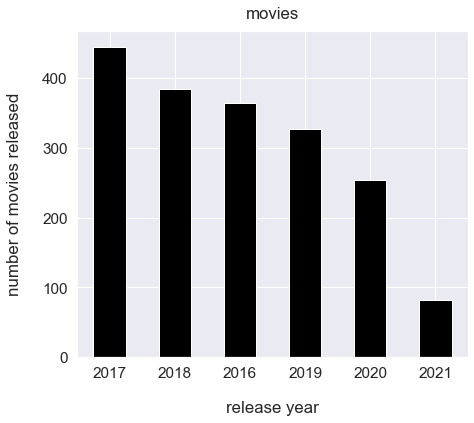

In [13]:
sns.set(font_scale=1.4)
recent_movies['release_year'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0 , color = "black")
plt.xlabel("release year", labelpad=20)
plt.ylabel("number of movies released", labelpad=20)
plt.title("movies", y=1.02);

In [14]:
recent_movies_2= netflix_df.loc[netflix_df["release_year"]>2015][["country","release_year"]].groupby("country").count()
recent_movies_2.reset_index()
recent_movies_2 = recent_movies.sort_values(["release_year"], ascending = False).head(20)
recent_movies_2

,country,release_year
269,India,2021
343,India,2021
348,United Kingdom,2021
222,United States,2021
220,United States,2021
219,India,2021
218,United States,2021
444,India,2021
216,United States,2021
350,India,2021


In [15]:
us_df = netflix_df.loc[(netflix_df['country'] == 'United States')]
us_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97


In [16]:
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom')]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119
21,s118,Final Account,2021,Movie,PG-13,United Kingdom,Documentaries,94
23,s123,In the Cut,2003,Movie,R,United Kingdom,Thrillers,118
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101


In [17]:
india_df = netflix_df.loc[(netflix_df['country'] == 'india')]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119
21,s118,Final Account,2021,Movie,PG-13,United Kingdom,Documentaries,94
23,s123,In the Cut,2003,Movie,R,United Kingdom,Thrillers,118
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101


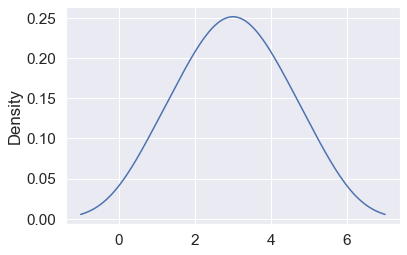

In [18]:
s = pd.Series([1, 2, 2.5, 3, 3.5, 4, 5])
ax = s.plot.kde()

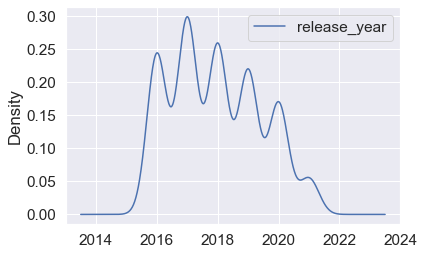

In [19]:
df = pd.DataFrame({
    'x': [1, 2, 2.5, 3, 3.5, 4, 5],
    'y': [4, 4, 4.5, 5, 5.5, 6, 6],
})
ax = recent_movies.plot.kde()


In [20]:
netflix_df.describe()

,release_year,duration
count,3558.000000,3558.000000
mean,2011.912591,103.275998
std,10.287760,26.900889
min,1942.000000,41.000000
25%,2010.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,119.000000
max,2021.000000,312.000000


<AxesSubplot:xlabel='release_year', ylabel='Count'>

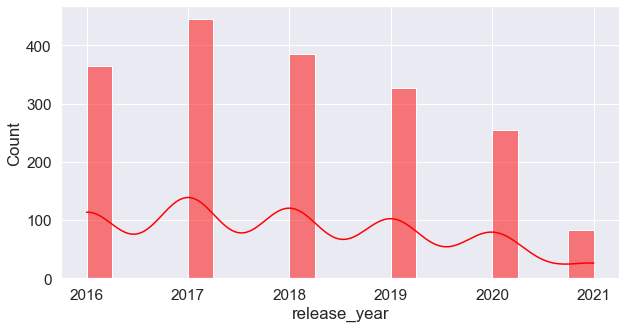

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data= recent_movies , x="release_year", kde=True, bins=20, color = "red")

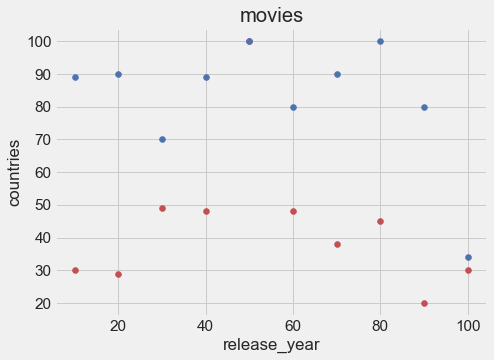

In [30]:
countries = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
release_year = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
movies = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(movies, release_year, color='r')
ax.scatter(movies, countries, color='b')
ax.set_xlabel('release_year')
ax.set_ylabel('countries')
ax.set_title('movies')
plt.show()

In [40]:
# Labels for the sections of our pie chart
labels = ["United States", "India", "United Kingdom", ]

# The values of each section of the pie chart
sizes = [1219, 421, 218]

# The colors of each section of the pie chart
colors = ["#E7212B", "#F49CA1", "red"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0, 0)

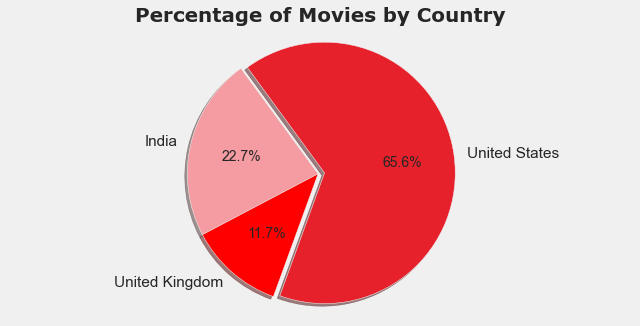

In [41]:
plt.figure(figsize=(10,5))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Percentage of Movies by Country", fontweight = 'bold', fontname = "Verdana", fontsize=20)

plt.show()